# Praca domowa 6
#### Mikołaj Ryll
##### Źródło: https://www.kaggle.com/datasets/keremabdullahoglu/laptop-price-dataset-april-2024

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("cleaned.csv")

# Opis zbioru danych

Zbiór danych zawiera informacje na temat sprzedaży laptopów na platformie eBay.

In [7]:
print("Wielkość danych")
print()
print(df.shape)

Wielkość danych

(2952, 10)


In [8]:
print("Typ danych")
print()
print(df.dtypes)

Typ danych

Brand                   object
Product_Description     object
Screen_Size            float64
RAM                     object
Processor               object
GPU                     object
GPU_Type                object
Resolution              object
Condition               object
Price                  float64
dtype: object


# Analiza zmiennych w zbiorze danych

In [9]:
print("Statystyki")
print()
print(df.describe())

Statystyki

       Screen_Size        Price
count  2952.000000  2952.000000
mean     14.550237   517.552805
std       1.175322   235.592872
min      10.000000     0.000000
25%      14.000000   325.990000
50%      14.000000   489.990000
75%      15.600000   699.000000
max      18.000000   999.990000


# Analiza zmiennych w zależności od przynależności do grup 

In [11]:
print("Mediana rozmiaru ekranu oraz ceny w zależności od nazwy producenta")
print()
print(df.groupby('Brand').median(numeric_only=True))

Mediana rozmiaru ekranu oraz ceny w zależności od nazwy producenta

           Screen_Size    Price
Brand                          
AVITA            14.00  559.970
Acer             15.60  549.475
Apple            13.30  499.000
Asus             15.60  548.940
ByteSpeed        15.60  199.990
Chuwi            14.05  259.990
Dell             14.00  433.750
Dell Inc.        15.60  215.990
Eurocom          15.60  800.000
Gateway          14.10  324.990
Getac            13.30  759.490
Gigabyte         15.60  849.950
Google           13.30  459.990
HP               15.60  499.000
Huawei           13.90  399.600
Intel            14.55  724.995
LG               16.00  703.000
Lenovo           14.00  428.980
MSI              15.60  700.000
Microsoft        13.00  599.000
Panasonic        10.10  669.000
Razer            15.60  579.990
Ruggon           10.10  800.000
Samsung          15.60  671.990
Sony             14.10  589.000


# Rozkład zmiennych w zbiorze danych wraz z wnioskami

Wykres przedstawia rozkład rodzajów procesorów graficznych w w zbiorze danych. Najczęściej występujący typ to: Integrated/On-Board Graphics. Drugim typem, który występuję znacznie rzadziej, jest Dedicated Graphics. Pozostałe wartości występują w bardzo małej liczbie, rzędu kilku lub kilkunastu sztuk.

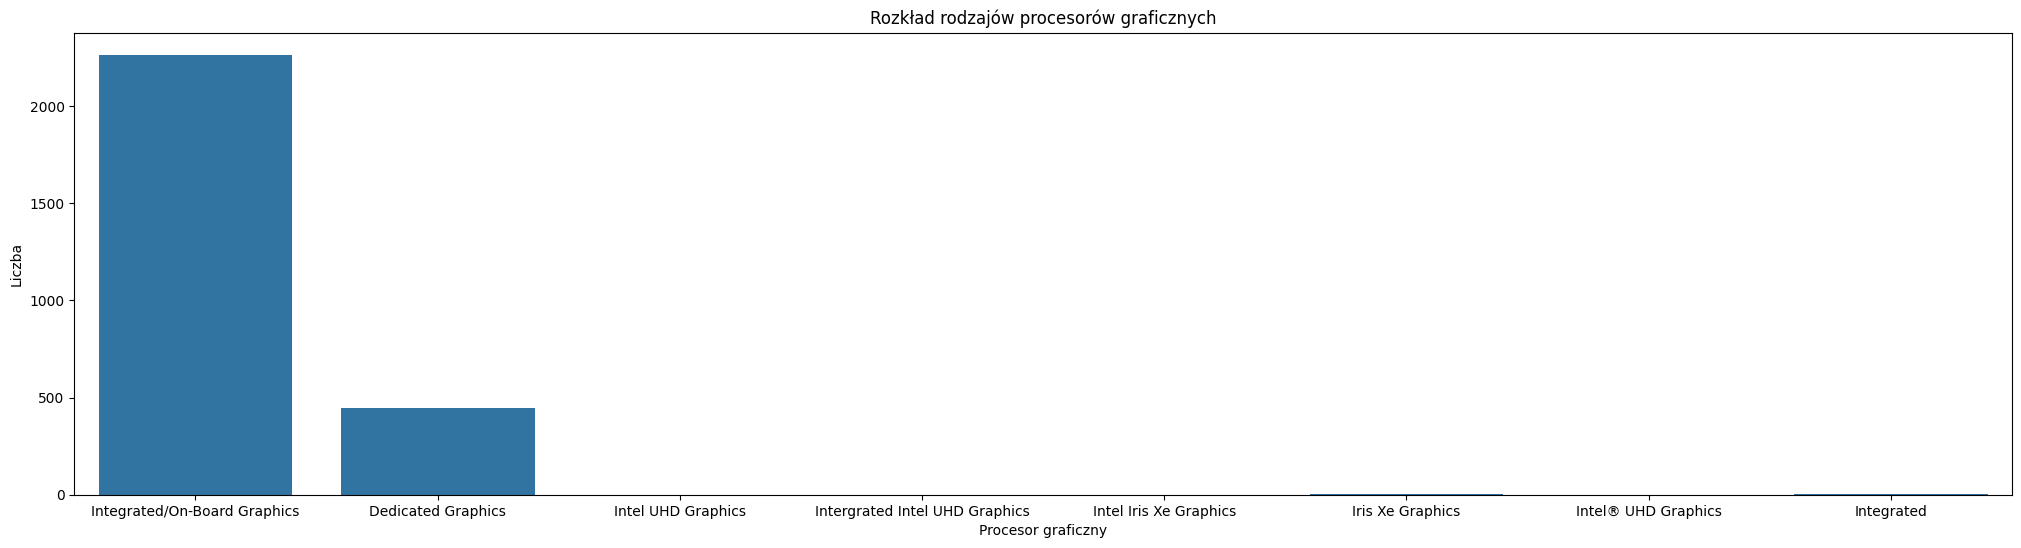

In [16]:
plt.figure(figsize=(25, 6))
sns.countplot(data=df, x='GPU_Type')
plt.title('Rozkład rodzajów procesorów graficznych')
plt.xlabel('Procesor graficzny')
plt.ylabel('Liczba')
plt.show()

Wykres przedstawia rozkład ceny laptopów. Można zauważyć, że występują laptopy o cenie do $75, ale jest ich niewiele. W każdym przedziale powyżej $75 występuje stosunkowo dużo laptopów, jednak tendencja jest taka, że im większa cena, tym wybór staje się coraz mniejszy.

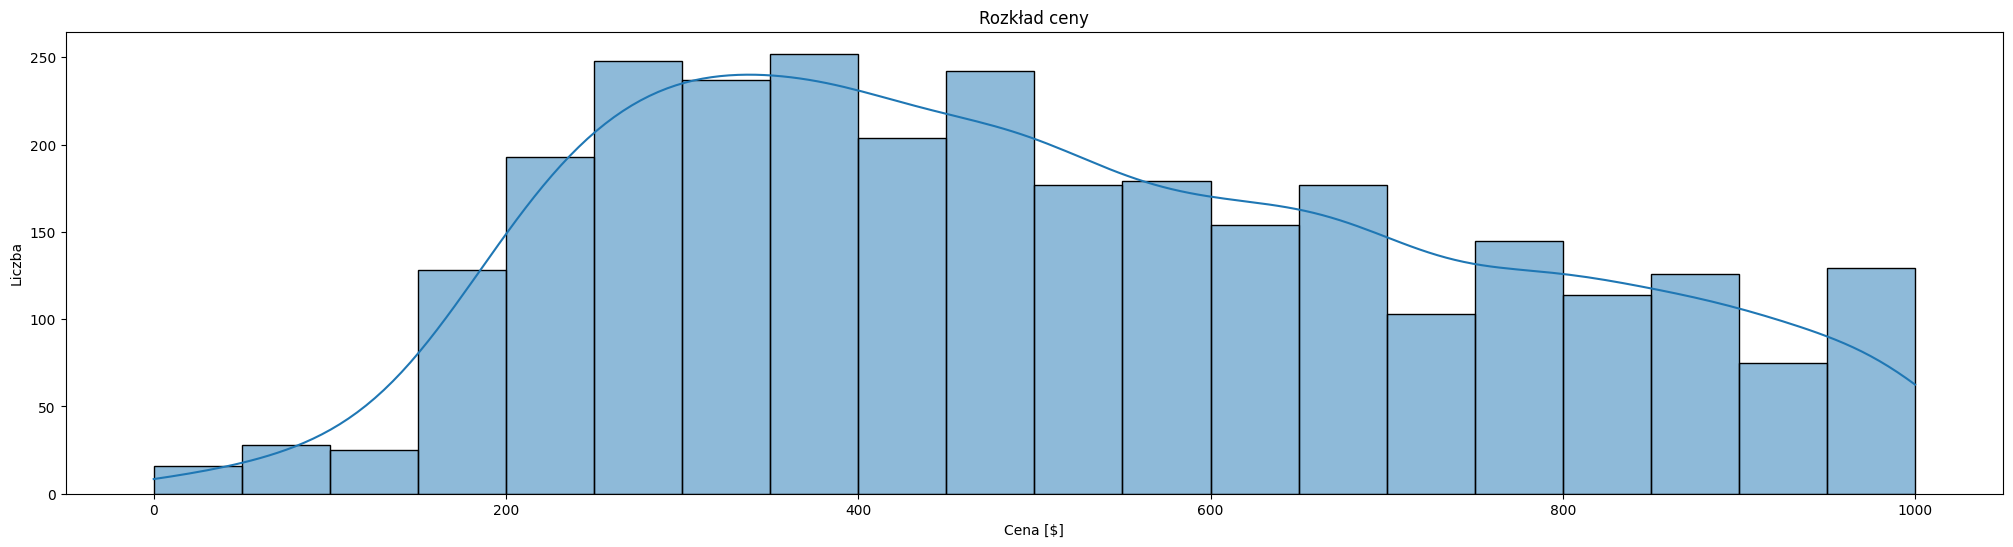

In [18]:
plt.figure(figsize=(25, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Rozkład ceny')
plt.xlabel('Cena [$]')
plt.ylabel('Liczba')
plt.show()

## Zależności w zbiorze danych

Wykres przedstawia rozkład ceny laptopów w zależności od producenta oraz przekątnej ekranu. Możemy zauważyć, że przekątne ekranu występują w pewnych standardach, lecz zdarzają się pojedyncze modele o nieregularnym rozmiarze ekranu. Możemy zauważyć, że laptopy Della dominują liczebnością. Ponadto laptopy o nieregularnych rozmiarach ekranu najczęściej są produkowane przez Lenovo.

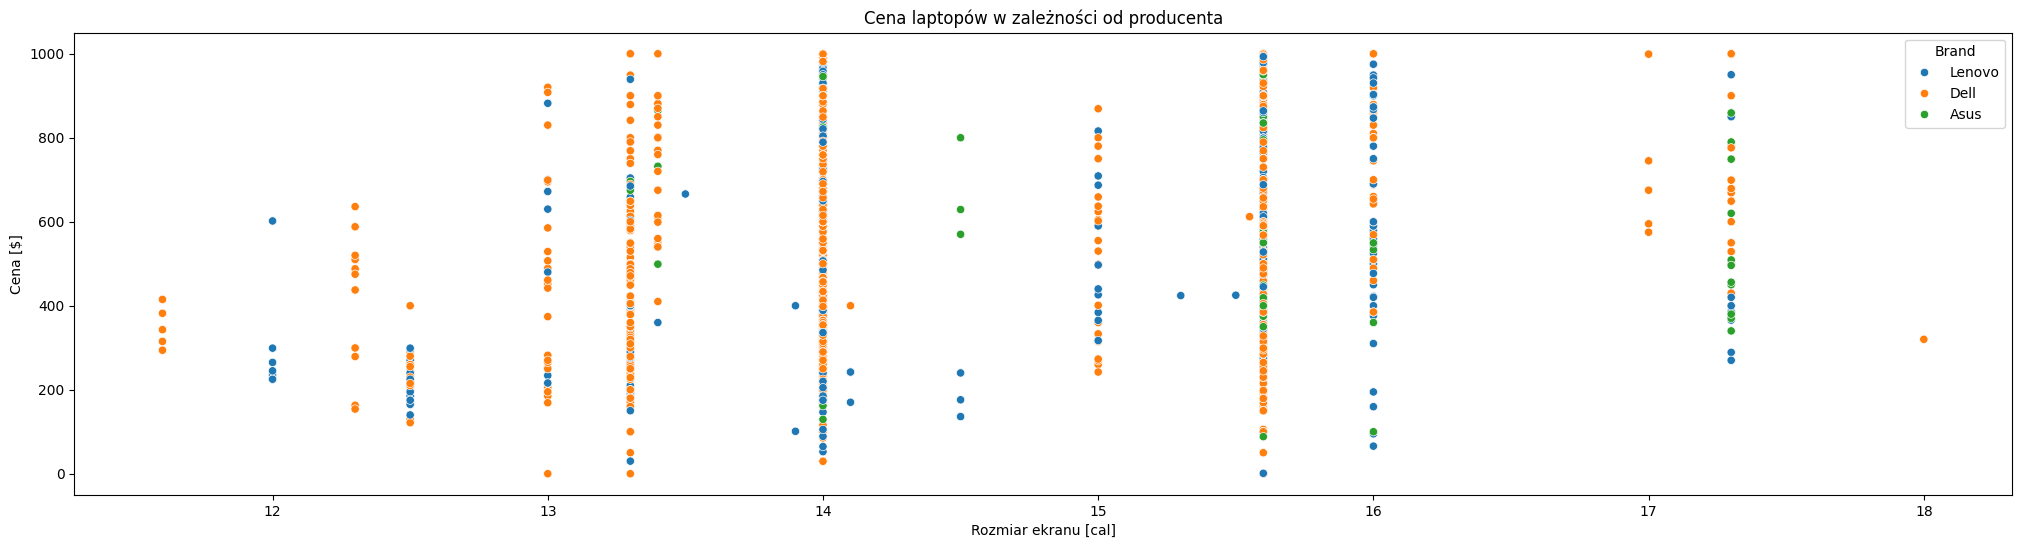

In [36]:
plt.figure(figsize=(25, 6))
sns.scatterplot(data=df[df['Brand'].isin(['Dell', 'Asus', 'Lenovo'])], x='Screen_Size', y='Price', hue='Brand')
plt.title('Cena laptopów w zależności od producenta')
plt.xlabel('Rozmiar ekranu [cal]')
plt.ylabel('Cena [$]')
plt.show()

Wykres przedstawia zależność pomiędzy ceną laptop a jego stanem. Najdroższe laptopy są nowe, następnie te z otwartymi opakowania i następnie cena maleje wraz ze z gorszym stanem laptopa. Intuicja znajduje odzwierciedlenie w danych.

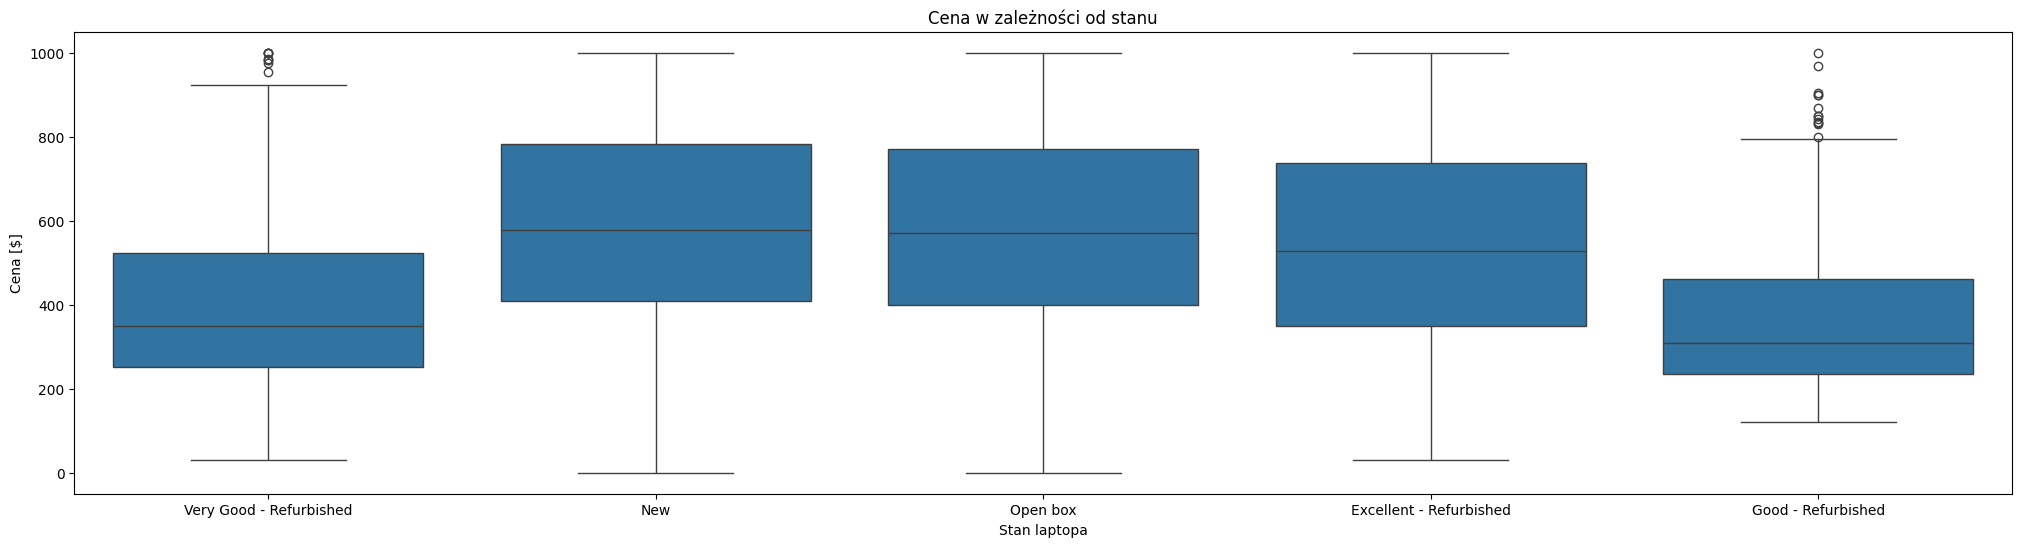

In [38]:
plt.figure(figsize=(25, 6))
sns.boxplot(data=df, x='Condition', y='Price')
plt.title('Cena w zależności od stanu')
plt.xlabel('Stan laptopa')
plt.ylabel('Cena [$]')
plt.show()
